# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import get_data_home
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\CLAUDIOCLEMENTE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


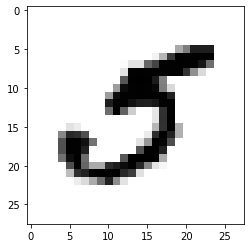

In [7]:
plt.imshow(X[36000].reshape(28,28),cmap = matplotlib.cm.binary, interpolation="nearest")

In [5]:
X_train = X[0:60000]
X_test = X[60000:]
y_train = y[0:60000]
y_test = y[60000:]

In [6]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3328 - accuracy: 0.9053
Epoch 2/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1426 - accuracy: 0.9568
Epoch 3/3
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0992 - accuracy: 0.9696


In [9]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.0917 - accuracy: 0.9723
0.09174649975877255 0.9723
